<a href="https://colab.research.google.com/github/niteshsah3424/Application_Development_Lab-AD_LAB-/blob/main/week1_ad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# * Week 1: Introduction to Machine Learning

# Objective: Understand the basics of machine learning and Python / R,etc

# Experiment:
# Write a Python program to demonstrate data preprocessing steps:
# handling missing values, encoding categorical data, and feature
# scaling.

# 1.Load a sample dataset using pandas (e.g., Iris or a custom dataset).
# 2.lot the distribution of a feature using matplotlib.pyplot.hist().
# 3.Create scatter plots to understand relationships between features using
# seaborn.scatterplot().
# 4.Use a correlation heatmap to find the relationship between multiple
# features with seaborn.heatmap().

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

In [5]:

df=sns.load_dataset("iris")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:

df.loc[5:10,'sepal_length']=np.nan


In [7]:

print(df.isnull().sum())

sepal_length    6
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [8]:

df['sepal_length'].fillna(df['sepal_length'].mean(),inplace=True)


/tmp/ipython-input-101166487.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sepal_length'].fillna(df['sepal_length'].mean(),inplace=True)


In [9]:

le=LabelEncoder()
df['species_encoded']=le.fit_transform(df['species'])
print(df[['species','species_encoded']].head())


  species  species_encoded
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0


In [10]:

scaler = StandardScaler()

scaled_features = scaler.fit_transform(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

scaled_df = pd.DataFrame(
    scaled_features,
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)

print(scaled_df.head())


   sepal_length  sepal_width  petal_length  petal_width
0     -0.973943     1.019004     -1.340227    -1.315444
1     -1.223494    -0.131979     -1.340227    -1.315444
2     -1.473046     0.328414     -1.397064    -1.315444
3     -1.597821     0.098217     -1.283389    -1.315444
4     -1.098719     1.249201     -1.340227    -1.315444


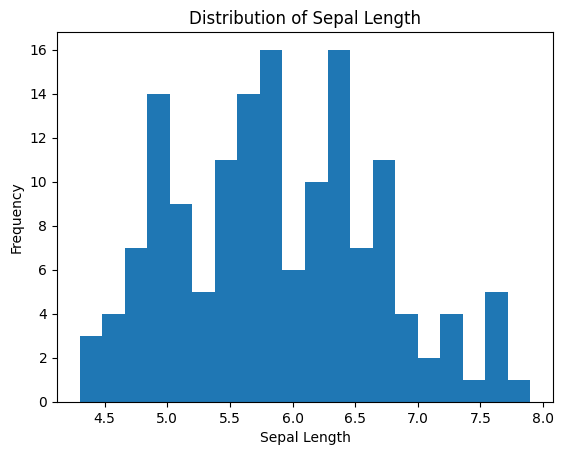

In [11]:

plt.hist(df['sepal_length'], bins=20)
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sepal Length")
plt.show()


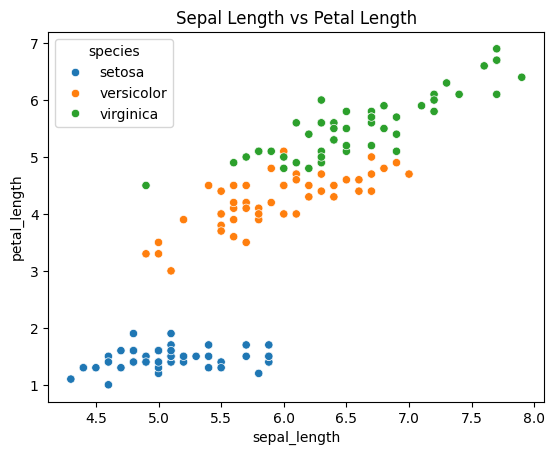

In [12]:

sns.scatterplot(
    x='sepal_length',
    y='petal_length',
    hue='species',
    data=df
)
plt.title("Sepal Length vs Petal Length")
plt.show()


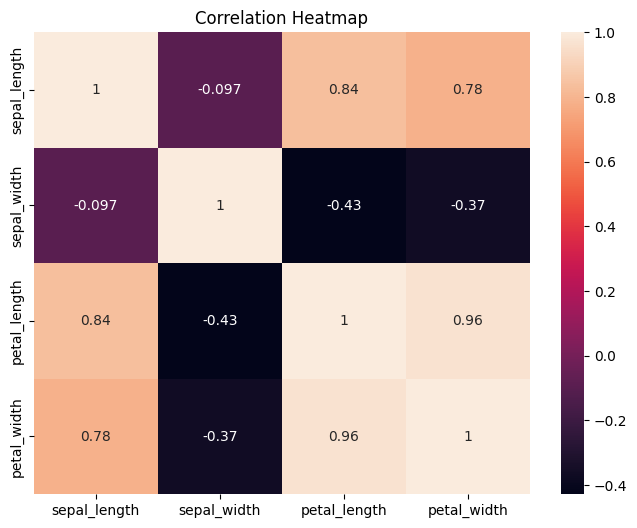

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(),
    annot=True
)
plt.title("Correlation Heatmap")
plt.show()

